In [2]:
#Predict whether a building is high performance or not using machine learning algorithms such as desicion tree and svm
from aibpd.data.preprocessing import PreprocessingCBECS
from aibpd.data.database import Database
import numpy as np
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import aibpd

In [3]:
s1 = pd.Series([7.3, np.nan, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4], index=['a', 'c', 'd', 'e'])

In [4]:
s1.iloc[]

In [3]:
database=Database(file_path='CBECS2012.csv')
Preproc=PreprocessingCBECS(database)

Please select a database to continue the analysis
CBECS2012.csv has been loaded.
Your selected dataframe has 23 columns.
There are 8 columns that have missing values.
                   Missing Values  % of Total Values
MAINCL                        684               10.2
buildingShape                 614                9.1
WWR                           614                9.1
MAINHT                        534                7.9
HVACUpgrade                   361                5.4
insulationUpgrade             361                5.4
RENWLL                        361                5.4
lightingUpgrade               361                5.4


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
CBECS_DF= pd.read_pickle('C:\\Users\\tzcha\\Documents\\aibpd\\application\\CBECS_4heating_clf.plk')
y=CBECS_DF['heatingLevel']

In [6]:
indexList=[1,2,3,4,5,6,7]

In [7]:
allFeature=['buildingAreaCategory','buildingShape','censusRegion','climateZone','HDD65',
            'HVACUpgrade','insulationUpgrade','MAINHT','MONUSEC','OWNTYPE', 'region',
            'RENWLL','roofConstruction','wallConstruction','WHOPPR','WINTYP','WKHRSC',
            'WWR','yearOfConstruction']
al=np.array(allFeature)
al_iter=list(al[indexList])
mainFeaturesCBECS_Categorical=[]
mainFeaturesCBECS_numeric=[]
mainFeaturesCBECS_Categorical1=['buildingAreaCategory','buildingShape',
                'censusRegion','climateZone','HVACUpgrade',
                'insulationUpgrade','MAINHT','MONUSEC','OWNTYPE', 
                'region','RENWLL','roofConstruction','wallConstruction',
                    'WHOPPR','WINTYP','WKHRSC']
mainFeaturesCBECS_numeric1=['HDD65','WWR','yearOfConstruction']
for feature in al_iter:
    if feature in mainFeaturesCBECS_numeric1:
        mainFeaturesCBECS_numeric.append(feature)
    elif feature in mainFeaturesCBECS_Categorical1:
        mainFeaturesCBECS_Categorical.append(feature)

In [10]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer,mainFeaturesCBECS_numeric),
        ('cat', categorical_transformer,mainFeaturesCBECS_Categorical)])

In [103]:
allFeatures=mainFeaturesCBECS_numeric+mainFeaturesCBECS_Categorical
X = preprocessor.fit_transform(CBECS_DF[allFeatures])

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
from sklearn import svm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import auc,roc_curve
clf = Pipeline(steps=[('classifier', svm.SVC())])
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
print(auc(fpr, tpr))
print("model score: %.3f" % clf.score(X_test, y_test))

0.6170568561872909
model score: 0.612


C:\Users\tzcha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [106]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

C:\Users\tzcha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [171]:
param = {'max_depth': 2, 'eta': 0.8, 'verbosity': 1, 'objective': 'binary:logistic','gamma':0.5}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtrain, 'train'),(dtest, 'test')]
num_round = 10
dtrain1=xgb.DMatrix(X, label=y)
bst = xgb.train(param,dtrain, num_round,evallist,callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                        xgb.callback.early_stop(3)])

[0]	train-auc:0.561395	test-auc:0.560201
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 3 rounds.
[0]	train-auc:0.561395	test-auc:0.560201
[1]	train-auc:0.583912	test-auc:0.623746
[1]	train-auc:0.583912	test-auc:0.623746
[2]	train-auc:0.608481	test-auc:0.592809
[2]	train-auc:0.608481	test-auc:0.592809
[3]	train-auc:0.633417	test-auc:0.609532
[3]	train-auc:0.633417	test-auc:0.609532
[4]	train-auc:0.633417	test-auc:0.609532
Stopping. Best iteration:
[1]	train-auc:0.583912	test-auc:0.623746



C:\Users\tzcha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\tzcha\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [172]:
res = xgb.cv(param, dtrain, num_boost_round=10, nfold=5,metrics={'auc'}, seed=0,callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(3)])

[0]	train-auc:0.570507+0.014805	test-auc:0.485836+0.0534883
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 3 rounds.
[1]	train-auc:0.61628+0.0261078	test-auc:0.494006+0.0589445
[2]	train-auc:0.637687+0.0254487	test-auc:0.499156+0.0534997
[3]	train-auc:0.647563+0.0269985	test-auc:0.494136+0.0520948
[4]	train-auc:0.649308+0.0275123	test-auc:0.495194+0.0507621
[5]	train-auc:0.652995+0.029937	test-auc:0.491226+0.0560095
Stopping. Best iteration:
[2]	train-auc:0.637687+0.0254487	test-auc:0.499156+0.0534997



In [173]:
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

In [181]:
df=xgb.cv(param, dtrain, num_round, nfold=5, metrics={'auc'},seed=0, obj=logregobj, feval=evalerror)

In [182]:
df

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.580715,0.027434,0.507693,0.016912,0.473664,0.048453,0.507692,0.067646
1,0.592748,0.039754,0.507693,0.016912,0.453823,0.022699,0.507692,0.067646
2,0.609081,0.032526,0.507693,0.016912,0.453550,0.024530,0.507692,0.067646
3,0.610218,0.033343,0.507693,0.016912,0.458812,0.031976,0.507692,0.067646
4,0.613195,0.033817,0.507693,0.016912,0.459338,0.032769,0.507692,0.067646
5,0.614822,0.034417,0.507693,0.016912,0.456720,0.026186,0.507692,0.067646
6,0.619989,0.033918,0.507693,0.016912,0.466239,0.031322,0.507692,0.067646
7,0.621535,0.034875,0.507693,0.016912,0.465186,0.030829,0.507692,0.067646
8,0.624238,0.029998,0.507693,0.016912,0.479186,0.047214,0.507692,0.067646
9,0.624271,0.030019,0.507693,0.016912,0.478660,0.047243,0.507692,0.067646


In [183]:
np.max(df['test-auc-mean'].values)

0.4791862

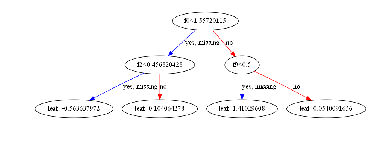

In [36]:
ax1=xgb.plot_tree(bst, num_trees=2)

In [49]:
clf = Pipeline(steps=[('classifier', svm.SVC(gamma='auto'))])
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train,y_train)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
for i in feat_cols:
    print(allFeatures[i])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2019-06-03 13:43:50] Features: 1/10 -- score: 0.5176864357017029[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2019-06-03 13:43:51] Features: 2/10 -- score: 0.5192248972401645[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2019-06-03 13:43:51] Features: 3/10 -- score: 0.5176981796829125[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[0, 3, 4, 5, 6, 7, 8, 10, 15, 22]
HDD65
buildingAreaCategory
climateZone
MAINHT


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished

[2019-06-03 13:44:00] Features: 10/10 -- score: 0.5038520258367587

IndexError: list index out of range

In [ ]:
print(X_train)